In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}
plt.rcParams['text.usetex'] = False

In [2]:
class gantt:
    
    options = {
        "header": {
            "year": {
                "facecolor": "#002060",
                "fontcolor": "#ffffff",
                "fontweight": "bold",
                "fontsize": 14,
                "height": 0.05
            },
            "month": {
                "facecolor": "#ffffff",
                "fontcolor": "#000000",
                "fontweight": "bold",
                "fontsize": 14,
                "height": 0.05
            }
        },
        "grid": {
            "edgecolor": "grey"
        },
        "tasklist":{
            "width": 0.3,
            "header": {
                "fontsize": 20,
                "fontweight": "bold",
                "fontcolor": "#ffffff",
                "facecolor": "#002060"
            },
            "task": {
                "fontsize": 14,
                "fontweight": "normal",
                "fontcolor": "#000000",
                "facecolor": "#ffffff"
            }
        },
        "bars": {
            "thickness": 0.2,
            "edgecolor": "k",
            "facecolor": "#0070C0",
            "start": {
                "style": "^",
                "size": 1000,
                "color": "orange",
                "edgecolor": "k"
            },
            "end": {
                "style": "v",
                "size": 1000,
                "color": "red",
                "edgecolor": "k"
            }
        }
    }
    
    def __init__(self, nMonths, tasks):
        self.fig = plt.figure(figsize=(20,7))
        self.ax = self.fig.add_axes([0,0,1,1])
        plt.xlim(0,1)
        plt.ylim(0,1)
        self.nMonths = nMonths
        self.tasks = tasks
        self.nTasks = len(tasks)

    def setNMonths(self, nMonths):
        self.nMonths = nMonths
        
    def setTasks(self, tasks):
        self.tasks = tasks
        self.nTasks = len(tasks)
        
    def drawBox(self, name, w, h, left, bottom, center=True, weight="normal", fontsize=12, color="black", facecolor="#ffffff", edgecolor="#000000", wrap=False):
        right = left + w
        top = bottom + h
        p = patches.Rectangle((left, bottom), w, h, fill=True, facecolor=facecolor, edgecolor=edgecolor, transform=self.ax.transAxes, clip_on=False)

        self.ax.add_patch(p)
        if center:
            txt = self.ax.text(0.5*(left+right), 0.5*(bottom+top), name,
                    horizontalalignment="center",
                    verticalalignment="center",
                    weight=weight,
                    fontsize=fontsize, color=color,
                    transform=self.ax.transAxes,
                    wrap=wrap)
        else:
            txt = self.ax.text(0.1*(left+right), 0.5*(bottom+top), name,
                    horizontalalignment="left",
                    verticalalignment="center",
                    weight=weight,
                    fontsize=fontsize, color=color,
                    transform=self.ax.transAxes,
                    wrap=wrap)
        if wrap:
            bbox = p.get_window_extent().transformed(self.fig.dpi_scale_trans.inverted())
            width, height = bbox.width, bbox.height
            txt._get_wrap_line_width = lambda : self.fig.dpi*width*0.8
    
    def mkHeader(self):
        self.drawBox("Task Schedule", 
                     self.options["tasklist"]["width"], 
                     float(self.options["header"]["year"]["height"]+self.options["header"]["month"]["height"]), 
                     0.0, 
                     1.0-float(self.options["header"]["year"]["height"]+self.options["header"]["month"]["height"]), 
                     weight=self.options["tasklist"]["header"]["fontweight"],
                     fontsize=self.options["tasklist"]["header"]["fontsize"],
                     color=self.options["tasklist"]["header"]["fontcolor"],
                     facecolor=self.options["tasklist"]["header"]["facecolor"])
            
        for i, y in enumerate(self.months_per_year):
            self.drawBox("Year %d"%(i+1),
                         y*self.year_width/12.0,
                         self.options["header"]["year"]["height"],
                         self.options["tasklist"]["width"]+(i*self.year_width),
                         1.0-self.options["header"]["year"]["height"],
                         weight=self.options["header"]["year"]["fontweight"],
                         fontsize=self.options["header"]["year"]["fontsize"],
                         color=self.options["header"]["year"]["fontcolor"],
                         facecolor=self.options["header"]["year"]["facecolor"])
        m = 1
        for n in range(self.nMonths):
            self.drawBox("%d"%(m),
                         self.month_width,
                         self.options["header"]["month"]["height"],
                         self.options["tasklist"]["width"]+(n*self.month_width),
                         1.0-self.options["header"]["year"]["height"]-self.options["header"]["month"]["height"],
                         weight=self.options["header"]["year"]["fontweight"],
                         fontsize=self.options["header"]["year"]["fontsize"])
            m += 1
            if m == 13:
                m = 1
            
        return
    
    def mkGrid(self):
        for n in range(1,len(self.tasks)+1):
            self.drawBox(self.tasks[n-1].getName(),
                         self.options["tasklist"]["width"],
                         self.tasklist_height/self.nTasks,
                         0.0,
                         self.tasklist_height-n*(self.tasklist_height/self.nTasks),
                         center=False,
                         fontsize=self.options["tasklist"]["task"]["fontsize"],
                         wrap=True)
            
            for i in range(self.nMonths):
                self.drawBox("",
                             self.month_width,
                             self.tasklist_height/self.nTasks,
                             self.options["tasklist"]["width"]+(i*self.month_width),
                             self.tasklist_height-n*(self.tasklist_height/self.nTasks),
                             edgecolor=self.options["grid"]["edgecolor"])
                
    def mkBars(self):
        for n, task in enumerate(self.tasks):
            self.drawBox("",
                         self.month_width*(task.getLength()-1),
                         self.options["bars"]["thickness"]*self.task_width,
                         self.options["tasklist"]["width"]+self.month_width*task.getStart()-(self.month_width/2.0),
                         self.tasklist_height+self.task_width*(0.5-(n+1)-self.options["bars"]["thickness"]/2.0),
                         edgecolor=self.options["bars"]["edgecolor"],
                         facecolor=self.options["bars"]["facecolor"])
            x_start = self.options["tasklist"]["width"]+self.month_width*task.getStart()-(self.month_width/2.0)
            x_end = x_start + self.month_width*(task.getLength()-1)
            self.ax.scatter(x_start,
                            (self.tasklist_height-(n+1)*self.task_width)+(self.task_width/2.0),
                            marker=self.options["bars"]["start"]["style"],
                            c=self.options["bars"]["start"]["color"],
                            edgecolor=self.options["bars"]["start"]["edgecolor"],
                            s=self.options["bars"]["start"]["size"],
                            zorder=1000)
            self.ax.scatter(x_end,
                            (self.tasklist_height-(n+1)*self.task_width)+(self.task_width/2.0),
                            marker=self.options["bars"]["end"]["style"],
                            c=self.options["bars"]["end"]["color"],
                            edgecolor=self.options["bars"]["end"]["edgecolor"],
                            s=self.options["bars"]["end"]["size"],
                            zorder=1000)
        
    def plot(self):
        self.months_per_year = [12 for n in range(np.floor(self.nMonths/12).astype(int))]
        if self.nMonths%12 > 0:
            self.months_per_year.append(self.nMonths%12)
        self.year_width = (1.0-self.options["tasklist"]["width"])/(self.nMonths/12)
        self.month_width = (1.0-self.options["tasklist"]["width"])/self.nMonths
        self.tasklist_height = 1.0 - float(self.options["header"]["year"]["height"]+self.options["header"]["month"]["height"])
        self.task_width = self.tasklist_height/self.nTasks
        
        self.mkHeader()
        self.mkGrid()
        self.mkBars()
        
    def to_png(self, pngname):
        self.plot()
        self.fig.savefig(pngname)

In [3]:
class task:
    def __init__(self, name, start, length):
        self.name = name
        self.start = start
        self.length = length
        
    def getName(self):
        return self.name
    
    def getStart(self):
        return self.start
    
    def getLength(self):
        return self.length

In [4]:
tasks = [
    task("Task 1", 1, 4),
    task("Task 2", 5, 4),
    task("Task 3", 9, 4),
    task("Task 4", 1, 7),
    task("Task 5", 3, 10),
    task("Task 6a", 13, 2),
    task("Task 6b", 13, 12)
]

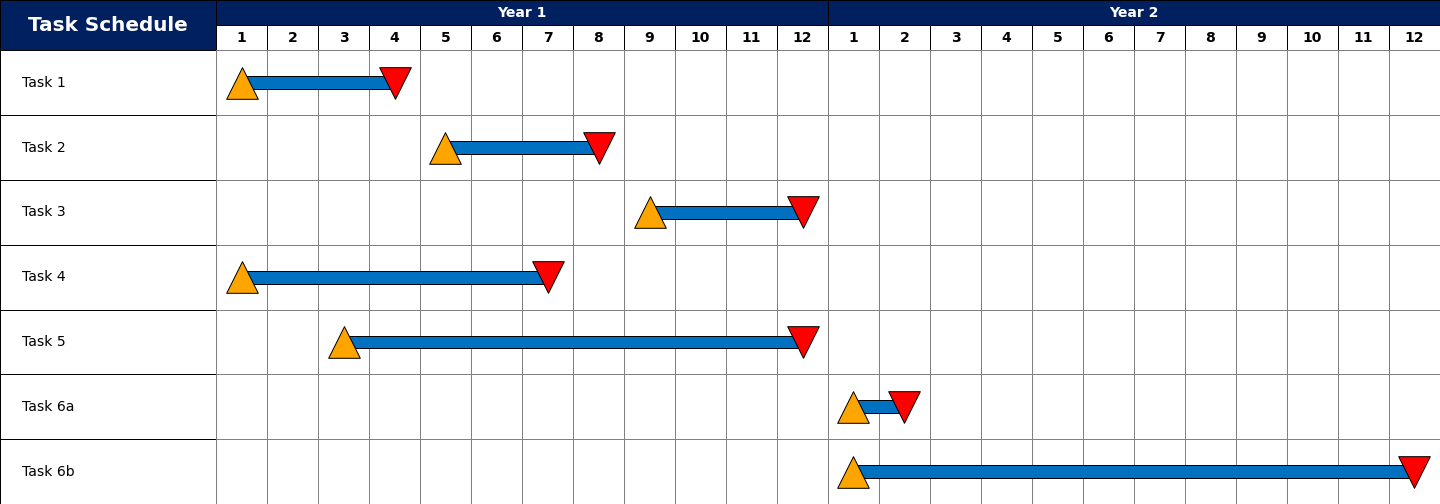

In [5]:
g = gantt(24, tasks)
g.options["tasklist"]["width"] = 0.15
g.to_png("gantt.png")